In [4]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# load the dataset
data = pd.read_csv('data_new.csv')

# check the dimension of the dataset
print(data.shape)

# view the first 5 rows of the dataset
data.head()

(1000, 10)


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",Stockport,Santander,4.0,"""Best saving""",Bank of England Of UK is located nearby in our...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Basildon,Santander,5.0,"""Good service""","I have my salary account in Santander, when I ...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Croydon,Lloyds Bank,5.0,"""Excellent Service""",I am using Lloyds Bank saving account for the ...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Stevenage,HSBC,5.0,"""Excellent service""",I have my salary bank account in HSBC for many...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Cardiff,Unknown,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                996 non-null    object 
 1   date                  1000 non-null   object 
 2   address               1000 non-null   object 
 3   bank                  1000 non-null   object 
 4   rating                1000 non-null   float64
 5   review_title_by_user  1000 non-null   object 
 6   review                1000 non-null   object 
 7   bank_image            1000 non-null   object 
 8   rating_title_by_user  1000 non-null   object 
 9   useful_count          1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [7]:
# total number of bank and address in the dataset

numAddress = data['address'].nunique()
numBank = data['bank'].nunique()

print(f'The reviews are collected from {numBank} different banks that located around {numAddress} of places in United Kingdom.')
print('These banks are: ', data.bank.unique())

The reviews are collected from 10 different banks that located around 106 of places in United Kingdom.
These banks are:  ['Santander' 'Lloyds Bank' 'HSBC' 'Unknown' 'Monzo' 'Barclays' 'NatWest'
 'Metro Bank' 'Halifax' 'Nationwide']


In [8]:
# some of the data without 'bank' name and is named as 'review' in the dataset
# convert these data to 'Unknown'

data['bank'].replace('review','Unknown', inplace=True)

In [9]:
data.drop(columns=['author', 'date', 'bank_image'], axis=1, inplace=True)

In [10]:
data.head()

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count
0,Stockport,Santander,4.0,"""Best saving""",Bank of England Of UK is located nearby in our...,Great!,133
1,Basildon,Santander,5.0,"""Good service""","I have my salary account in Santander, when I ...",Blown Away!,89
2,Croydon,Lloyds Bank,5.0,"""Excellent Service""",I am using Lloyds Bank saving account for the ...,Blown Away!,48
3,Stevenage,HSBC,5.0,"""Excellent service""",I have my salary bank account in HSBC for many...,Blown Away!,52
4,Cardiff,Unknown,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22


In [11]:
data['bank'].unique()

array(['Santander', 'Lloyds Bank', 'HSBC', 'Unknown', 'Monzo', 'Barclays',
       'NatWest', 'Metro Bank', 'Halifax', 'Nationwide'], dtype=object)

In [12]:
# total number of bank and address in the dataset

numAddress = data['address'].nunique()
numBank = data['bank'].nunique()

print(f'The reviews are collected from {numBank} different banks that located around {numAddress} of places in United Kingdom.')
print('These banks are: ', data.bank.unique())

The reviews are collected from 10 different banks that located around 106 of places in United Kingdom.
These banks are:  ['Santander' 'Lloyds Bank' 'HSBC' 'Unknown' 'Monzo' 'Barclays' 'NatWest'
 'Metro Bank' 'Halifax' 'Nationwide']


In [13]:
#shades_of_blue = ['#0000FF', '#1E00FF', '#4169E1', '#6295ED', '#87CEEB', 
                  #'#00008B', '#0000CD', '#0000EE', '#0000FF', '#1E90FF', 
                 # '#00BFFF', '#87CEFA', '#B0E0E6', '#ADD8E6', '#E0FFFF']

In [14]:
shades_of_blue = ['#a0d1ff', '#70bbff', '#41a4ff', '#0d6abf', '#094780', 
                  '#a0a7d8', '#717bc5', '#414fb1', '#0e1a77', '#09124f']

In [15]:
explode = ([0.05]*5) + ([0]*5)

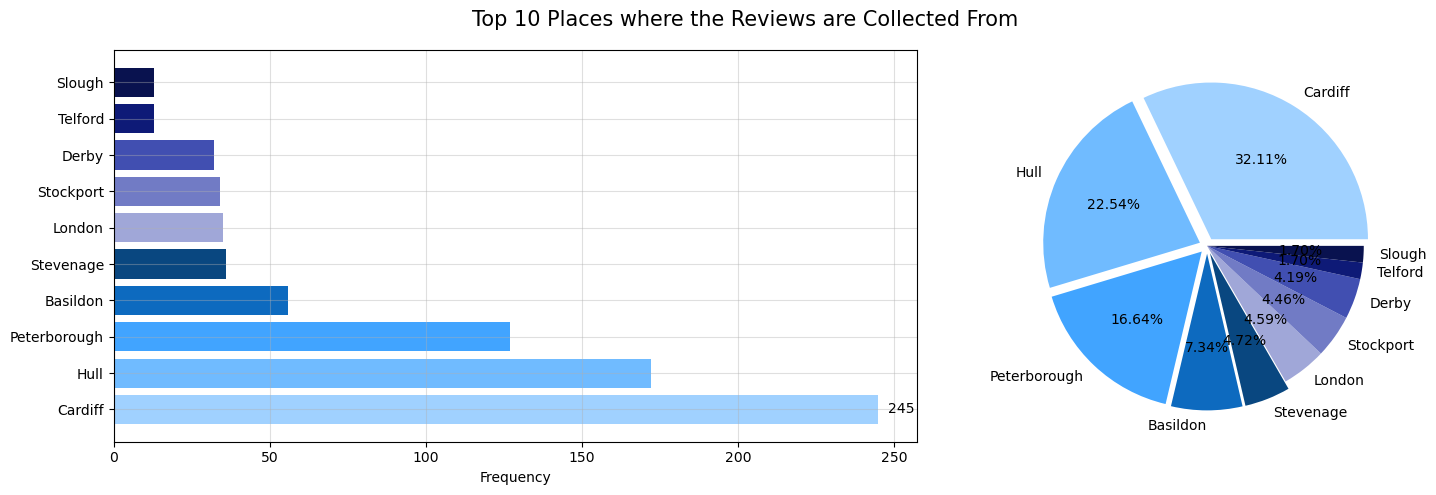

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
# distribution of the column 'address'
address = data['address'].value_counts().sort_values(ascending=False)[:10]

# visualization (top 10 places where the reviews are collected from)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=address.index, width=address.values, color=shades_of_blue)
axes[0].set_xlabel('Frequency')

for index, values in enumerate(address):
    axes[0].text(values+3, index, str(values), va='center')
    axes[0].grid(alpha=0.4)
    axes[1].pie(address.values, labels=address.index, autopct='%.2f%%', explode=explode, colors=shades_of_blue)
    figure.suptitle('Top 10 Places where the Reviews are Collected From', fontsize=15)
    plt.tight_layout()
    plt.show()

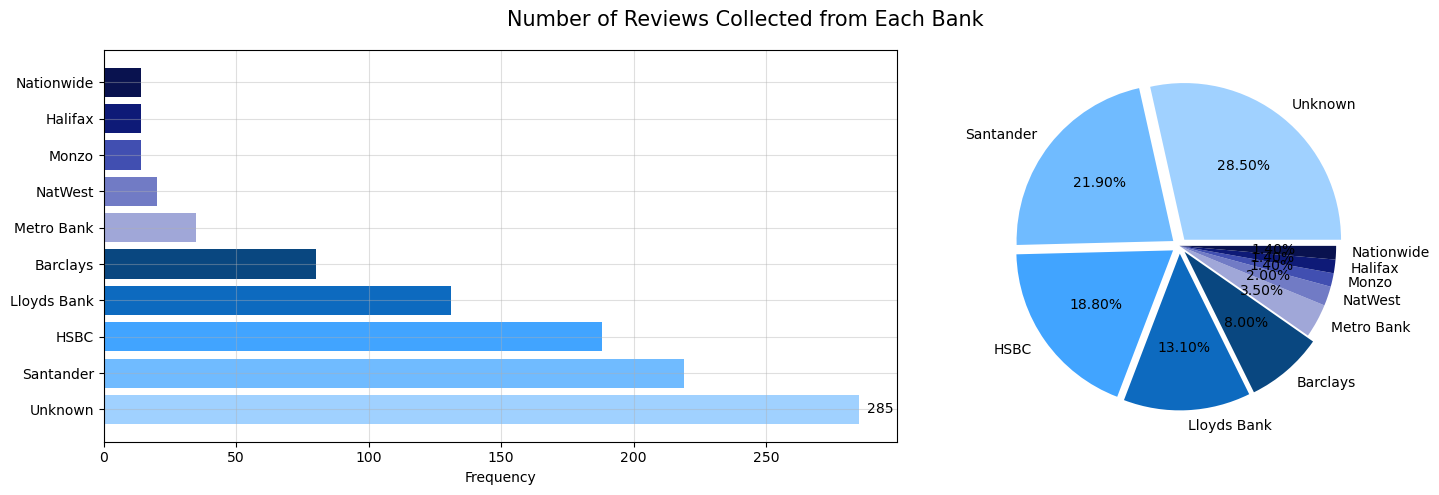

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
# distribution of the column 'bank'
bank = data['bank'].value_counts().sort_values(ascending=False)[:10]

# visualization (top 10 places where the reviews are collected from)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=bank.index, width=bank.values, color=shades_of_blue[:len(bank)])
axes[0].set_xlabel('Frequency')

for index, values in enumerate(bank):
    axes[0].text(values+3, index, str(values), va='center')
    axes[0].grid(alpha=0.4)
    axes[1].pie(bank.values, labels=bank.index, autopct='%.2f%%', explode=explode, colors=shades_of_blue[:len(bank)])
    figure.suptitle('Number of Reviews Collected from Each Bank', fontsize=15)
    plt.tight_layout()
    plt.show()

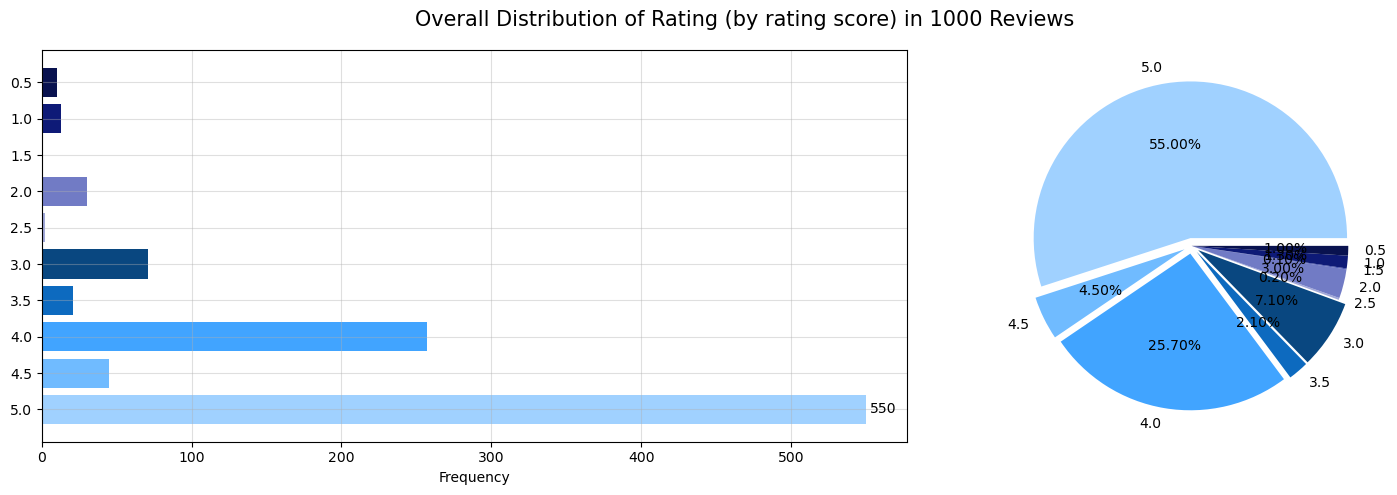

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
# distribution of rating (by rating score)
# convert the rating from int to str
data_copy = data.copy()
data_copy['rating'] = data_copy['rating'].astype(str)

rating = data_copy['rating'].value_counts().sort_index(ascending=False)

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=rating.index, width=rating.values, color=shades_of_blue)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (rating):
        axes[0].text(values+3, index, str(values), va='center')
        axes[0].grid(alpha=0.4)
        axes[1].pie(rating.values, labels=rating.index, autopct='%.2f%%', explode=explode, colors=shades_of_blue[:len(address)])
        figure.suptitle('Overall Distribution of Rating (by rating score) in 1000 Reviews', fontsize=15)
        plt.tight_layout()
        plt.show()

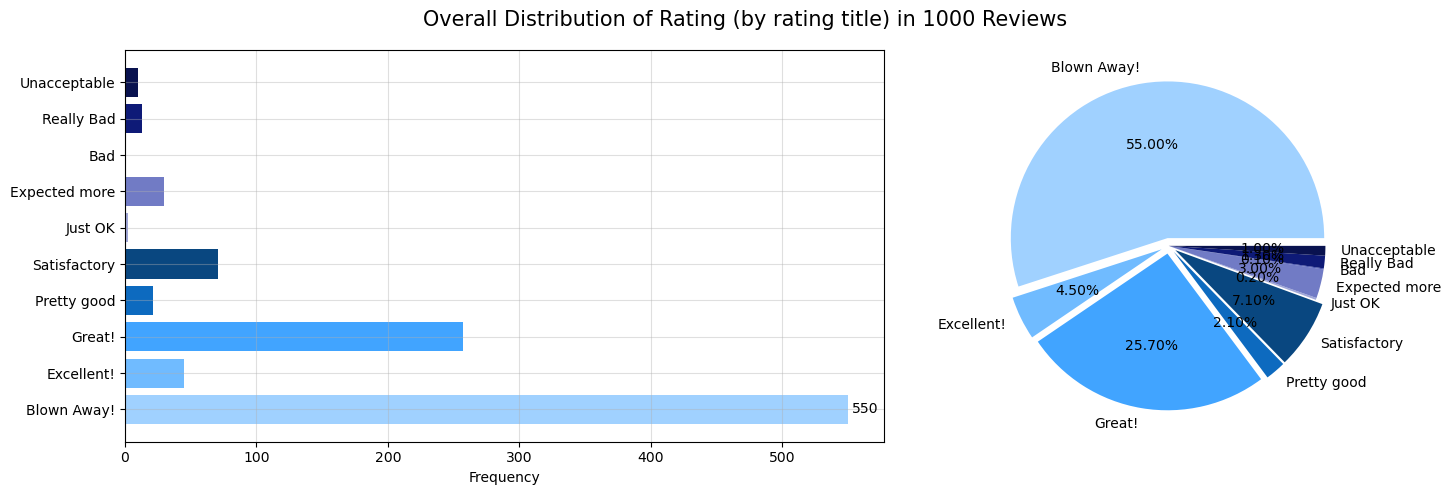

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
# distribution of rating (by rating title)

rating_order = ['Unacceptable','Really Bad','Bad','Expected more','Just OK','Satisfactory','Pretty good','Great!','Excellent!','Blown Away!']
rating_title = data['rating_title_by_user'].value_counts(sort=False).reindex(rating_order)
reversed_rating_title = rating_title[::-1]

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=reversed_rating_title.index, width=reversed_rating_title.values, color=shades_of_blue)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (reversed_rating_title):
        axes[0].text(values+3, index, str(values), va='center')
        axes[0].grid(alpha=0.4)
        axes[1].pie(reversed_rating_title.values, labels=reversed_rating_title.index, autopct='%.2f%%', explode=explode, colors=shades_of_blue)
        figure.suptitle('Overall Distribution of Rating (by rating title) in 1000 Reviews', fontsize=15)
        plt.tight_layout()
        plt.show()

In [20]:
from wordcloud import WordCloud
import random

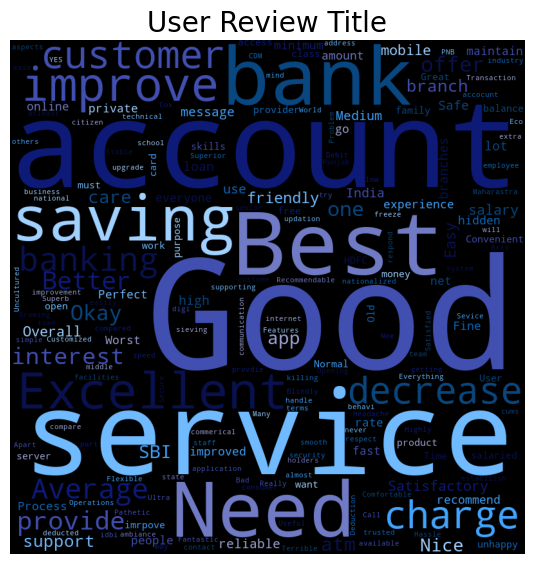

In [21]:
combined_title = ' '.join(data['review_title_by_user'])

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(shades_of_blue)

# create a word cloud using the combined text
wordcloud_title = WordCloud(collocations=False, width = 800, height = 800,
                            background_color ='black',
                            min_font_size = 10,
                            color_func=color_func).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('User Review Title', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

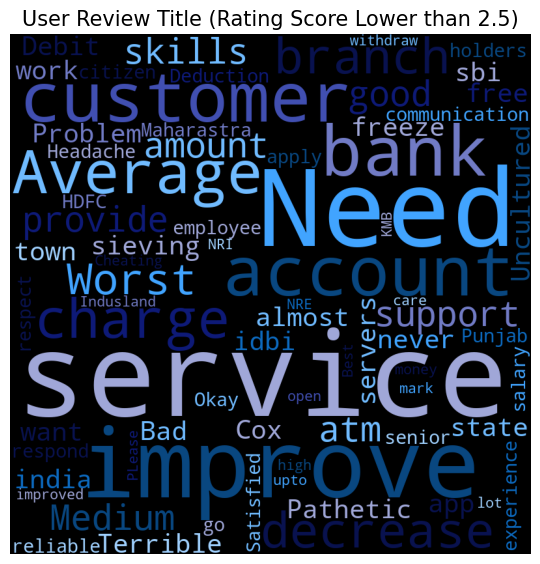

In [22]:
# subset the data that rating score is 2.5 and lower
data_copy = data.copy()
data_copy = data[data['rating']<=2.5]

# combine the review titles for the subsetted data
combined_title_lowrate = ' '.join(data_copy['review_title_by_user'])

# Function to choose a random color from shades_of_blue for each word
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(shades_of_blue)

# create a word cloud using the combined text
wordcloud_lowrate = WordCloud(collocations=False, width = 800, height = 800,
                              background_color ='black',
                              min_font_size = 10,
                              color_func=color_func).generate(combined_title_lowrate)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_lowrate)
plt.axis('off')
plt.title('User Review Title (Rating Score Lower than 2.5)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [23]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the object of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [24]:
# calculate the polarity scores of the review
data['polarity'] = data['review'].apply(sia.polarity_scores)
data['compound'] = data['polarity'].apply(lambda x: x.get('compound'))

In [25]:
# define a function to perform the sentiment categorization
def categorize(score):
        if score < 0:
            return 'To be Improved'
        elif score > 0.8:
            return 'Blown Away'
        else:
            return 'Neutral'

In [26]:
# insert a new column 'Sentiment_Category' by categorized the sentiment based on the compound score
data['Sentiment_Category'] = data['compound'].apply(categorize)

# view the first 5 rows of the data after new columns inserted
data.head()

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count,polarity,compound,Sentiment_Category
0,Stockport,Santander,4.0,"""Best saving""",Bank of England Of UK is located nearby in our...,Great!,133,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.7264,Neutral
1,Basildon,Santander,5.0,"""Good service""","I have my salary account in Santander, when I ...",Blown Away!,89,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.7165,Neutral
2,Croydon,Lloyds Bank,5.0,"""Excellent Service""",I am using Lloyds Bank saving account for the ...,Blown Away!,48,"{'neg': 0.08, 'neu': 0.785, 'pos': 0.135, 'com...",0.4588,Neutral
3,Stevenage,HSBC,5.0,"""Excellent service""",I have my salary bank account in HSBC for many...,Blown Away!,52,"{'neg': 0.043, 'neu': 0.846, 'pos': 0.11, 'com...",0.5267,Neutral
4,Cardiff,Unknown,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.7357,Neutral


In [27]:
df=data.groupby('Sentiment_Category').count()

In [28]:
df.head().sort_values(['compound'])

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count,polarity,compound
Sentiment_Category,,,,,,,,,
Blown Away,201,201,201,201,201,201,201,201,201
To be Improved,225,225,225,225,225,225,225,225,225
Neutral,574,574,574,574,574,574,574,574,574


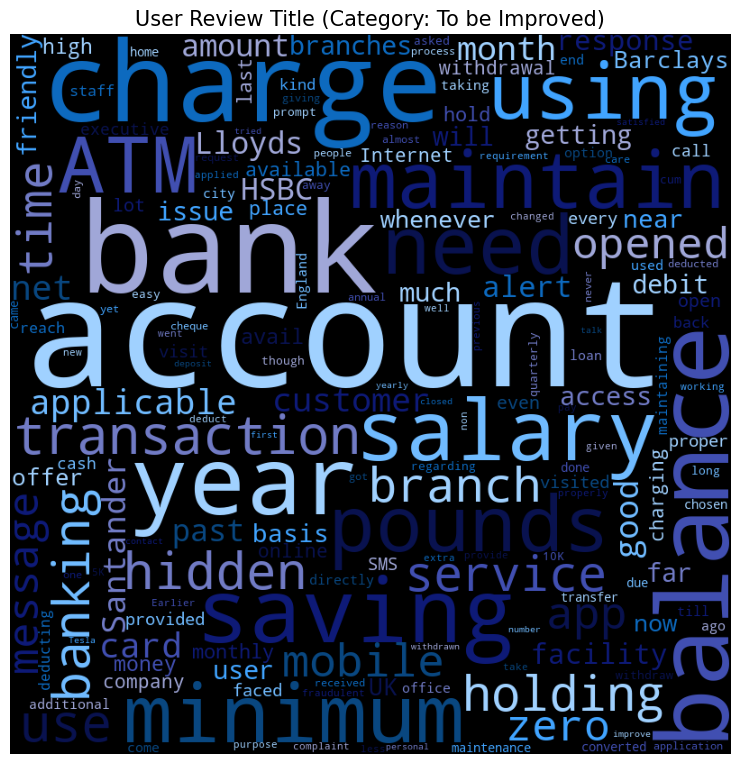

In [29]:
data_copy = data.copy()
data_copy = data[data['Sentiment_Category']=='To be Improved']

combined_tobeImproved = ' '.join(data_copy['review'])

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(shades_of_blue)

# create a word cloud using the combined text
wordcloud_tobeImproved = WordCloud(collocations=False, width = 800, height = 800,
                                                              background_color ='black',
                                                              min_font_size = 10,
                                  color_func=color_func).generate(combined_tobeImproved)

# plot the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_tobeImproved)
plt.axis('off')
plt.title('User Review Title (Category: To be Improved)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [30]:
import re

common_words = ['bank', 'account','salary','saving','savings','pounds']

pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, common_words)) + r')\b', flags=re.IGNORECASE)
filtered_string = pattern.sub('', combined_tobeImproved)

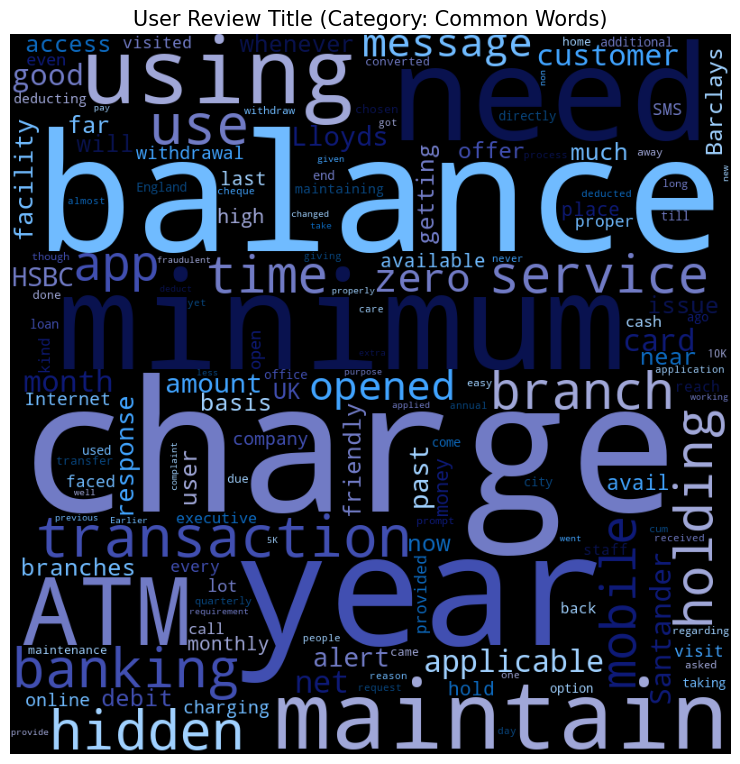

In [31]:
# create a word cloud using the combined text

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(shades_of_blue)

wordcloud_tobeImproved = WordCloud(collocations=False, width = 800, height = 800,
                                                              background_color ='black',
                                                              min_font_size = 10,
                                  color_func=color_func).generate(filtered_string)


# plot the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_tobeImproved)
plt.axis('off')
plt.title('User Review Title (Category: Common Words)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import re

# Pre-processing function for the review texts
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    return text

# Apply cleaning function to the review texts
data['cleaned_review'] = data['review'].apply(clean_text)

# Prepare the labels: Positive (1) if rating > 3, else Negative (0)
data['label'] = (data['rating'] > 3).astype(int)


In [33]:
data.to_csv('cleaned_data_sentiment.csv', index = False)